<a href="https://colab.research.google.com/github/Sakib1605/Symptom_Driven_Plant_Disease_Classification/blob/main/CIS_6050_Neural_Network_Project_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name: Symptom Driven Plant Disease Classification

Group Members:


*   **Poojan Vadaliya** [ID: 1281587]
*   **Mohammad Sakibul Islam** [ID: 1265299]
*   **Gurleen Pelia**   [ID: 1290675]


### Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os



# Path to the directory containing images on your Google Drive
images_dir = "/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data"

# Path to the directory containing text files on your Google Drive
texts_dir = "/content/drive/MyDrive/PLANT DISEASE RECOGNITION/Text_Files"

# Get a list of paths for images
images_paths = [os.path.join(images_dir, filename) for filename in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, filename))]

# Get a list of paths for text files
texts_paths = [os.path.join(texts_dir, filename) for filename in os.listdir(texts_dir) if os.path.isfile(os.path.join(texts_dir, filename))]

print("Image paths:")
print(images_paths)
print("\nText paths:")
print(texts_paths)


Image paths:
['/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/leaf blight/7e322351-379f-4b07-8001-01baf6bf589c___RS_Late.B 7038.JPG', '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/leaf blight/7ec8c270-72a5-4c84-bfdb-400735f5b35c___GHLB_PS Leaf 46 Day 18.jpg', '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/leaf blight/9e5dd34f-124c-4a64-ba9f-77c8d05faa9c___GHLB2 Leaf 8749.JPG', '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/leaf blight/04da342d-5952-4f2f-b19c-14cdc7fcb07b___GHLB2 Leaf 8716.JPG', '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/leaf blight/9b75e0b6-342b-4409-a02d-598e661160a6___GHLB2 Leaf 75.JPG', '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/leaf blight/8d58aa38-714a-45b6-b36d-fe52ab36aae8___GHLB Leaf 24.1 Day 12.JPG', '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/leaf blight/8cb8fc56-d6b5-4032-b5f4-aebe52af18a3___GHLB2 Leaf 8945.JPG', '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/leaf blight/1c8bf271-8455

In [ ]:
# Define the file path
file_path = '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/Text_Files/leaf blight.txt'

# Open the file and read the content
with open(file_path, 'r') as file:
    content = file.read()

# Display the content
print(content)


﻿The symptoms of tomato leaf blight are brown spots on the leaves, which can eventually lead to the leaves wilting and dying. The spots start out small and then gradually get larger, until they eventually cover the entire leaf. The spots are caused by a fungus that attacks the leaves of the plant, and can be spread by wind, rain, or insects. Leaf blight can be a serious problem for tomato plants, as it can reduce the plant's ability to produce fruit. In severe cases, leaf blight can even kill the plant.


In [ ]:
import pandas as pd
#Define a dataframe to put image path, type and label
columns = ['path','media_type','label']
plant_image_df = pd.DataFrame(columns=columns)

In [ ]:
import pandas as pd
import numpy as np
import os

# Loop through images
for image_path in images_paths:
    # Define media type
    media_type = "image"
    label = os.path.basename(os.path.dirname(image_path))

    # Create a new DataFrame with the new row
    new_record_df = pd.DataFrame({'path': [image_path],
                               'media_type': [media_type],
                               'label': [label]})

    # Concatenate the new DataFrame with the existing DataFrame
    plant_image_df = pd.concat([plant_image_df, new_record_df], ignore_index=True)

# Display the DataFrame
plant_image_df

path media_type        label
0    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image  leaf blight
1    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image  leaf blight
2    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image  leaf blight
3    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image  leaf blight
4    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image  leaf blight
..                                                 ...        ...          ...
495  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image      healthy
496  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image      healthy
497  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image      healthy
498  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image      healthy
499  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...      image      healthy

[500 rows x 3 columns]

In [ ]:
# Pip install necessary packages
!pip install google-generativeai langchain-google-genai streamlit pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packa

In [ ]:
# Setup Google API Key
import os
from getpass import getpass
os.environ["GOOGLE_API_KEY"] = (
    os.environ["GOOGLE_API_KEY"]
    if "GOOGLE_API_KEY" in os.environ
    else getpass("Google API Key: ")
)

Google API Key: ··········


In [ ]:
import google.generativeai as genai
genai.configure(api_key = os.environ['GOOGLE_API_KEY'])

In [ ]:
# Use Gemini Pro Vision model to handle multimodal inputs
vision_model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
from PIL import Image

# Helper function to get retrieved data ready to send to Gemini
def RAG_Setup(results):
  if results['media_type'] == 'image':
      image = Image.open(results['path'])
      retrieved_data =[]
      prompt = "describe the symptoms of diseases in tomato plant leaf image"
      query = "You will answer the given prompt using attached content : " + prompt
      retrieved_data.append(query)
      retrieved_data.append(image)
      label = os.path.basename(os.path.dirname(results['path']))
      retrieved_data.append(label)

      #print(retrieved_data)

  return retrieved_data



retrieved_data_list_for_RAG = {}

# The input list and retrieved results are now passed into the RAG_Setup helper function
# retrieved_data_for_RAG will now contain a dictionary including the prompt and retrieved text/image data
for index, record  in plant_image_df.iterrows():
    result = RAG_Setup(record)
    retrieved_data_list_for_RAG[index] = result



In [ ]:
# Extract the first key-value pair from the retrieved_data_list_for_RAG dictionary
first_key, first_result = next(iter(retrieved_data_list_for_RAG.items()))

response = vision_model.generate_content(first_result)
print(response.text)


 The symptoms of leaf blight are brown spots on the leaves that enlarge and turn black. The spots may have a yellow halo around them. The leaves may also wilt and die.


In [ ]:
# Get the key-value pair for the 20th element
key, result = list(retrieved_data_list_for_RAG.items())[2]

# Generate content for the current result using the vision_model
response = vision_model.generate_content(result)
print(response.text)


 The symptoms of leaf blight on tomato plants include brown spots on the leaves, which can eventually spread to the stems and fruit. The spots start out small and circular, but they can eventually grow together to form large, irregular patches. The leaves may also turn yellow and wilt. Leaf blight can be caused by a variety of fungi, including Alternaria solani and Septoria lycopersici.


In [ ]:
# Initialize an empty list to store the responses
responses = []

# Iterate over each key-value pair in the retrieved_data_list_for_RAG dictionary
for key, result in retrieved_data_list_for_RAG.items():
    # Generate content for the current result using the vision_model
    response = vision_model.generate_content(result)

    # Check if the response contains any valid content parts
    if response.parts:
        # Extract the text from the first content part
        first_part_text = response.parts[0].text
        responses.append(first_part_text)
    else:
        # If the response does not contain any valid content parts, append a placeholder message
        responses.append("Response not available")

# Print the list of responses
#print(responses)


In [ ]:
responses[0]

' The symptoms of leaf blight are small, water-soaked spots on the leaves that quickly enlarge and turn brown or black. The spots may have a yellow halo around them. The leaves may also wilt and die.'

In [ ]:
# Extract all the rows under the 'path' column
image_paths = plant_image_df['path'].tolist()
generated_symptoms_text = responses
image_disease_label = plant_image_df['label'].tolist()

In [ ]:
plant_data = {'Image path': image_paths, 'Generated Symptoms': generated_symptoms_text, 'Disease Label': image_disease_label}
plant_df = pd.DataFrame(plant_data)

# Print the DataFrame
plant_df

Image path  \
0    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
1    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
2    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
3    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
4    /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
..                                                 ...   
495  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
496  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
497  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
498  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   
499  /content/drive/MyDrive/PLANT DISEASE RECOGNITI...   

                                    Generated Symptoms Disease Label  
0     The symptoms of leaf blight are small, water-...   leaf blight  
1     The symptoms of leaf blight are small, water-...   leaf blight  
2     The tomato leaf in the image has late blight....   leaf blight  
3     The symptoms of leaf blight on tomato plants ...   leaf blight  
4     The symptoms of leaf blight on tomato plants ...   leaf blight  
..                                                 ...           ...  
495   The symptoms of leaf curl are:\n\n* Leaves be...     leaf curl  
496   Leaf curl is caused by the tomato leaf curl v...     leaf curl  
497   The symptoms of leaf curl are:\n\n* Leaves be...     leaf curl  
498   Symptoms of leaf curl disease in tomato plant...     leaf curl  
499   Symptoms of leaf curl disease in tomato plant...     leaf curl  

[500 rows x 3 columns]

In [ ]:
csv_file_path = "plant_data_updated.csv"

# Save the DataFrame to a CSV file
plant_df.to_csv(csv_file_path, index=False)


In [ ]:
import pandas as pd
plant_df = pd.read_csv('/content/drive/MyDrive/PLANT DISEASE RECOGNITION/plant_data_updated.csv')

In [ ]:
image_paths = plant_df['Image path'].tolist()
generated_symptoms = plant_df['Generated Symptoms'].tolist()

In [ ]:
import os
import pandas as pd
from nltk.translate.bleu_score import corpus_bleu
from nltk.tokenize import word_tokenize



# Read text files into memory
text_files = {}
text_files_dir = "/content/drive/MyDrive/PLANT DISEASE RECOGNITION/Text_Files"
for file_name in os.listdir(text_files_dir):
    with open(os.path.join(text_files_dir, file_name), "r") as file:
        text_files[file_name.split(".")[0]] = file.read()

# Define a function to preprocess text
def preprocess(text):
    tokens = word_tokenize(text.lower())
    return tokens



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from collections import defaultdict
from nltk.translate.bleu_score import corpus_bleu
from nltk.tokenize import word_tokenize

# Define a function to preprocess text
def preprocess(text):
    tokens = word_tokenize(text.lower())
    return tokens

# Initialize dictionary to store generated symptoms for each label
generated_symptoms_by_label = defaultdict(list)

# Aggregate generated symptoms for each label
for label, symptoms in zip(plant_df['Disease Label'], plant_df['Generated Symptoms']):
    generated_symptoms_by_label[label].append(symptoms)

# Initialize dictionary to store BLEU scores for each label
avg_bleu_scores = {}

# Calculate BLEU score for each label
for label, generated_symptoms_list in generated_symptoms_by_label.items():
    text_file_content = text_files.get(label, "")
    if text_file_content:
        references = [preprocess(text_file_content)]
        candidates = [preprocess(symptoms) for symptoms in generated_symptoms_list]
        # Adjust candidates into a list of lists
        candidates = [[candidate] for candidate in candidates]
        # Calculate BLEU score for each candidate
        bleu_scores = [corpus_bleu(references, candidate) for candidate in candidates]
        # Calculate average BLEU score for this class
        avg_bleu_scores[label] = sum(bleu_scores) / len(bleu_scores)

# Print average BLEU score for each class
for label, avg_bleu_score in avg_bleu_scores.items():
    print(f"Average BLEU score for class {label}: {avg_bleu_score}")


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Average BLEU score for class leaf blight: 8.468648532340905e-232
Average BLEU score for class verticulium wilt: 4.39279770690072e-232
Average BLEU score for class septoria: 8.710500434792284e-232
Average BLEU score for class healthy: 1.0093565239311503e-231
Average BLEU score for class leaf curl: 7.211855188647799e-232


In [ ]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from collections import defaultdict
from sentence_transformers import SentenceTransformer
import numpy as np

# Load a pre-trained sentence embedding model
model = SentenceTransformer('all-mpnet-base-v2')

# Initialize dictionary to store generated symptoms for each label
generated_symptoms_by_label = defaultdict(list)

# Aggregate generated symptoms for each label
for label, symptoms in zip(plant_df['Disease Label'], plant_df['Generated Symptoms']):
    generated_symptoms_by_label[label].append(symptoms)

# Initialize dictionary to store cosine similarity scores for each label
avg_cosine_sim_scores = {}

# Calculate cosine similarity for each label
for label, generated_symptoms_list in generated_symptoms_by_label.items():
    text_file_content = text_files.get(label, "")
    if text_file_content:
        references = text_file_content
        candidates = generated_symptoms_list
        # Compute the sentence embeddings
        ref_embedding = model.encode([references])[0]
        gen_embeddings = model.encode(candidates)
        # Calculate cosine similarity for each candidate
        cosine_sims = [np.dot(ref_embedding, gen_embedding) / (np.linalg.norm(ref_embedding) * np.linalg.norm(gen_embedding))
                       for gen_embedding in gen_embeddings]
        # Calculate average cosine similarity score for this class
        avg_cosine_sim_scores[label] = sum(cosine_sims) / len(cosine_sims)

# Print average cosine similarity score for each class
for label, avg_cosine_sim_score in avg_cosine_sim_scores.items():
    print(f"Average Cosine Similarity score for class {label}: {avg_cosine_sim_score:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Average Cosine Similarity score for class leaf blight: 0.8681
Average Cosine Similarity score for class verticulium wilt: 0.4159
Average Cosine Similarity score for class septoria: 0.8642
Average Cosine Similarity score for class healthy: 0.8759
Average Cosine Similarity score for class leaf curl: 0.6919


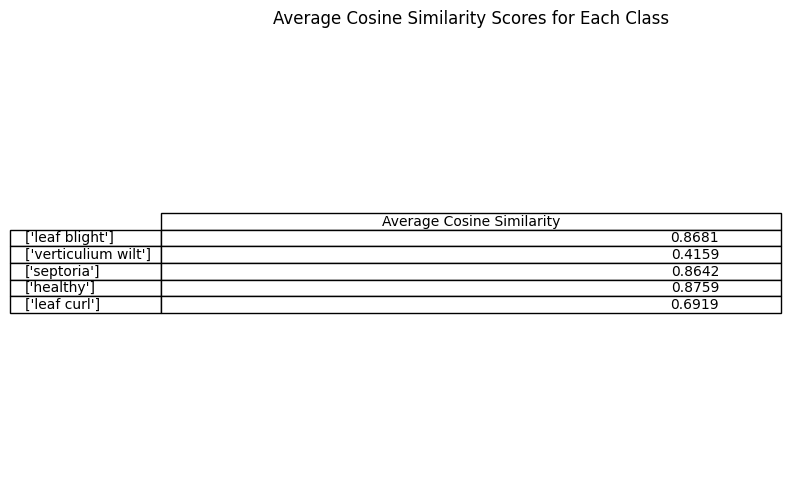

In [ ]:
import matplotlib.pyplot as plt

# Extract class labels and scores
class_labels = list(avg_cosine_sim_scores.keys())
cosine_sim_scores = list(avg_cosine_sim_scores.values())

# Plot the results in a table
plt.figure(figsize=(8, 6))
plt.table(cellText=[[f'{score:.4f}'] for score in cosine_sim_scores],
          rowLabels=[[label] for label in class_labels],
          colLabels=['Average Cosine Similarity'],
          loc='center')
plt.axis('off')
plt.title('Average Cosine Similarity Scores for Each Class')
plt.show()


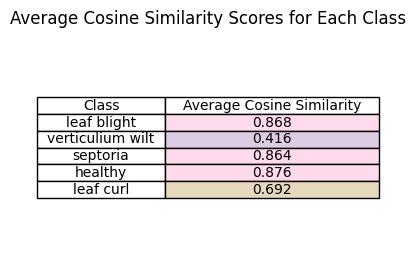

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract class labels and scores
class_labels = list(avg_cosine_sim_scores.keys())
cosine_sim_scores = list(avg_cosine_sim_scores.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(1, 3))

# Create the table with class labels and similarity scores
table_data = [[label, f'{score:.3f}'] for label, score in zip(class_labels, cosine_sim_scores)]
table = ax.table(cellText=table_data,
                 colLabels=['Class', 'Average Cosine Similarity'],
                 cellLoc='center',
                 loc='center')

# Hide axes
ax.axis('off')

# Add heatmap to the similarity scores cell
for i, score in enumerate(cosine_sim_scores):
    # Define the color based on the score
    color = plt.cm.Pastel1(score)
    # Add a colored patch representing the score
    table[(i + 1, 1)].set_facecolor(color)

# Adjust cell heights
table.auto_set_column_width([0, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)

# Show plot
plt.title('Average Cosine Similarity Scores for Each Class')
plt.show()


In [ ]:
generated_symptoms[0]

' The symptoms of leaf blight are small, water-soaked spots on the leaves that quickly enlarge and turn brown or black. The spots may have a yellow halo around them. The leaves may also wilt and die.'

In [ ]:
!pip install nltk
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

# Tokenize the texts
reference_text = content
candidate_text = generated_symptoms[2]

reference_tokens = [word_tokenize(reference_text)]
candidate_tokens = word_tokenize(candidate_text)

# Compute BLEU score
bleu_score = sentence_bleu(reference_tokens, candidate_tokens)

print(f"BLEU score: {bleu_score}")


BLEU score: 0.30474976310436


In [ ]:
generated_symptoms[499]

' Symptoms of leaf curl disease in tomato plants include:\n\n* Leaves become curled and distorted.\n* Leaves may also be stunted and yellowed.\n* The plant may stop growing and eventually die.'

In [ ]:
text_files

{'verticulium wilt': '\ufeffleaf is yellowing and wilting of the leaves, starting at the bottom of the plant and moving up. The leaves may also become dry and brittle. The stems may also be affected, becoming weak and discoloured. The disease is caused by the fungus Verticillium dahliae, which lives in the soil and can infect plants through their roots.presence of irregular, dark brown to black spots scattered across the leaf surface. The spots vary in size and shape, ranging from small, circular lesions to larger, more elongated ones.',
 'healthy': '\ufeffThe tomato leaf in the image appears healthy. It is green in color, which is a sign of good health. The leaf is also free of spots or blemishes, which could indicate a pest or disease problem. The leaf is also the right size and shape for a tomato leaf.',
 'leaf blight': "\ufeffThe symptoms of tomato leaf blight are brown spots on the leaves, which can eventually lead to the leaves wilting and dying. The spots start out small and the

In [ ]:
!pip install numpy scipy scikit-learn tensorflow tensorflow-hub sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define the file path and response text
file_path = '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/Text_Files/leaf blight.txt'
responses = ["The symptoms of leaf blight are small, water-soaked spots on the leaves that quickly enlarge and turn brown or black. The spots may have a yellow halo around them. The leaves may also wilt and die."]

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Read the content from the text file
with open(file_path, 'r') as file:
    content = file.read()

# Compute embeddings for content and response
content_embedding = embed([content])
response_embedding = embed(responses)

# Compute cosine similarity
similarity_score = cosine_similarity(content_embedding, response_embedding)

# Print the cosine similarity score
print(f"Cosine similarity score using USE: {similarity_score[0][0]}")


Cosine similarity score using USE: 0.7527929544448853


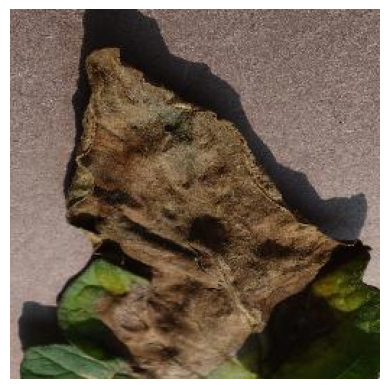

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = image_paths[87]
# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
generated_symptoms[87]

' The symptoms of leaf blight are brown spots on the leaves that can eventually lead to defoliation. The spots start out small and then enlarge, eventually merging together to form large, irregular lesions. The lesions are often surrounded by a yellow halo. Leaf blight can be caused by a variety of fungi, including Alternaria solani, Septoria lycopersici, and Phytophthora infestans.'

### Modelling

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import cv2
from tensorflow.keras.applications.vgg16 import VGG16

# Define your custom CNN model
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1./255),
])


from tensorflow.keras import backend as K

def create_multimodal_model_with_attention(image_shape, text_shape, num_classes):
    # Image input
    image_input = layers.Input(shape=image_shape)

    # Text input
    text_input = layers.Input(shape=text_shape)

    # Image feature extractor (VGG16)
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)
    vgg16.trainable = False
    cnn_output = vgg16(image_input)

    # Flatten CNN output
    cnn_output_flatten = layers.Flatten()(cnn_output)

    # Reshape CNN output to match the shape of the text input
    cnn_output_reshaped = layers.Reshape((cnn_output_flatten.shape[1], 1))(cnn_output_flatten)

    # Reshape text input to match the shape of the flattened CNN output
    text_reshaped = layers.Reshape((text_shape[0], 1))(text_input)

    # Concatenate text input with CNN output
    concatenated_features = layers.Concatenate(axis=1)([text_reshaped, cnn_output_reshaped])

    # Define attention mechanism
    attention_layer = layers.Dense(1, activation='tanh')
    attention_weights = attention_layer(concatenated_features)
    attention_weights = layers.Flatten()(attention_weights)
    attention_weights = layers.Activation('softmax')(attention_weights)
    attention_weights = layers.Reshape((K.int_shape(concatenated_features)[1], 1))(attention_weights)
    attended_output = layers.Dot(axes=[1, 1])([concatenated_features, attention_weights])

    # Flatten attended output
    flattened_attended_output = layers.Flatten()(attended_output)

    # Fully connected layers for classification
    x = layers.Dense(256, activation='relu')(flattened_attended_output)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[image_input, text_input], outputs=output)
    return model




# Define input shapes and number of classes
image_shape = (224, 224, 3)
text_shape = (250,)
num_classes = 5

image_paths = plant_df['Image path'].tolist()
symptoms_text = plant_df['Generated Symptoms'].tolist()
target_disease_labels = plant_df['Disease Label'].tolist()

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        # Load image using OpenCV
        image = cv2.imread(path)
        # Resize the image to a fixed size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype('float32') / 255.0
        # Append the preprocessed image to the list
        images.append(image)
    return images

# Preprocess image data
image_data = load_images(image_paths)

# Preprocess text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(symptoms_text)
symptoms_text_sequences = tokenizer.texts_to_sequences(symptoms_text)
max_seq_length = 250  # Define the maximum sequence length
symptoms_text_padded = pad_sequences(symptoms_text_sequences, maxlen=max_seq_length)

# Encode target disease labels
label_encoder = LabelEncoder()
target_disease_labels_encoded = label_encoder.fit_transform(target_disease_labels)

# Split the data into training and validation sets
image_data_train, image_data_val, symptoms_text_train, symptoms_text_val, target_disease_labels_encoded_train, target_disease_labels_encoded_val = train_test_split(image_data, symptoms_text_padded, target_disease_labels_encoded, test_size=0.2, random_state=42)

# Define input shapes and number of classes
image_shape = (224, 224, 3)
text_shape = (max_seq_length,)  # Use the maximum sequence length for text
num_classes = 5  # Define the number of classes


# Create multimodal model with attention mechanism
model = create_multimodal_model_with_attention(image_shape, text_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Display model summary
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 7, 7, 512)            1471468   ['input_1[0][0]']             
                                                          8                                       
                                                                                                  
 input_2 (InputLayer)        [(None, 250)]                0         []                            
                                                                                                  
 flatten (Flatten)           

In [ ]:
import numpy as np

# Convert lists to numpy arrays
image_data_train_np = np.array(image_data_train)
symptoms_text_train_np = np.array(symptoms_text_train)
target_disease_labels_encoded_train_np = np.array(target_disease_labels_encoded_train)

image_data_val_np = np.array(image_data_val)
symptoms_text_val_np = np.array(symptoms_text_val)
target_disease_labels_encoded_val_np = np.array(target_disease_labels_encoded_val)

# Ensure correct shapes
image_data_train_np = image_data_train_np.reshape(-1, 224, 224, 3)
symptoms_text_train_np = symptoms_text_train_np.reshape(-1, 250)

image_data_val_np = image_data_val_np.reshape(-1, 224, 224, 3)
symptoms_text_val_np = symptoms_text_val_np.reshape(-1, 250)


In [ ]:
history = model.fit(
    x=[image_data_train_np, symptoms_text_train_np],
    y=target_disease_labels_encoded_train_np,
    epochs= 10,
    batch_size= 20,
    validation_data=([image_data_val_np, symptoms_text_val_np], target_disease_labels_encoded_val_np)
)

Epoch 1/10
20/20 [==============================] - 12s 146ms/step - loss: 1.6117 - accuracy: 0.1975 - val_loss: 1.6171 - val_accuracy: 0.1000
Epoch 2/10
20/20 [==============================] - 2s 119ms/step - loss: 1.6005 - accuracy: 0.2050 - val_loss: 1.6148 - val_accuracy: 0.1400
Epoch 3/10
20/20 [==============================] - 3s 131ms/step - loss: 1.5970 - accuracy: 0.2000 - val_loss: 1.6109 - val_accuracy: 0.1700
Epoch 4/10
20/20 [==============================] - 3s 129ms/step - loss: 1.5917 - accuracy: 0.2175 - val_loss: 1.6141 - val_accuracy: 0.1700
Epoch 5/10
20/20 [==============================] - 2s 120ms/step - loss: 1.5867 - accuracy: 0.2250 - val_loss: 1.6065 - val_accuracy: 0.1700
Epoch 6/10
20/20 [==============================] - 3s 129ms/step - loss: 1.5848 - accuracy: 0.1875 - val_loss: 1.5985 - val_accuracy: 0.1500
Epoch 7/10
20/20 [==============================] - 3s 130ms/step - loss: 1.5761 - accuracy: 0.2150 - val_loss: 1.5950 - val_accuracy: 0.1700
Epoch

### VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1./255),
])

def create_multimodal_model(image_shape, text_shape, num_classes):
    # Image input
    image_input = layers.Input(shape=image_shape)

    # Text input
    text_input = layers.Input(shape=text_shape)

    # Image feature extractor (VGG16)
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)
    vgg16.trainable = False
    cnn_output = vgg16(image_input)

    # Flatten CNN output
    cnn_output_flatten = layers.Flatten()(cnn_output)

    # Concatenate image features and text embeddings
    concat_features = layers.concatenate([cnn_output_flatten, text_input])

    # Fully connected layers for classification
    x = layers.Dense(256, activation='relu')(concat_features)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[image_input, text_input], outputs=output)
    return model

# Define input shapes and number of classes
image_shape = (224, 224, 3)
text_shape = (250,)
num_classes = 5

image_paths = plant_df['Image path'].tolist()
symptoms_text = plant_df['Generated Symptoms'].tolist()
target_disease_labels = plant_df['Disease Label'].tolist()

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        # Load image using OpenCV
        image = cv2.imread(path)
        # Resize the image to a fixed size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype('float32') / 255.0
        # Append the preprocessed image to the list
        images.append(image)
    return images

# Preprocess image data
image_data = load_images(image_paths)

# Preprocess text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(symptoms_text)
symptoms_text_sequences = tokenizer.texts_to_sequences(symptoms_text)
max_seq_length = 250  # Define the maximum sequence length
symptoms_text_padded = pad_sequences(symptoms_text_sequences, maxlen=max_seq_length)

# Encode target disease labels
label_encoder = LabelEncoder()
target_disease_labels_encoded = label_encoder.fit_transform(target_disease_labels)

# Split the data into training and validation sets
image_data_train, image_data_val, symptoms_text_train, symptoms_text_val, target_disease_labels_encoded_train, target_disease_labels_encoded_val = train_test_split(image_data, symptoms_text_padded, target_disease_labels_encoded, test_size=0.2, random_state=42)

# Create multimodal model
model_VGG16 = create_multimodal_model(image_shape, text_shape, num_classes)

# Compile the model
model_VGG16.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Display model summary
model_VGG16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 7, 7, 512)            1471468   ['input_4[0][0]']             
                                                          8                                       
                                                                                                  
 flatten_1 (Flatten)         (None, 25088)                0         ['vgg16[0][0]']               
                                                                                                  
 input_5 (InputLayer)      

In [ ]:
import numpy as np

# Convert lists to numpy arrays
image_data_train_np = np.array(image_data_train)
symptoms_text_train_np = np.array(symptoms_text_train)
target_disease_labels_encoded_train_np = np.array(target_disease_labels_encoded_train)

image_data_val_np = np.array(image_data_val)
symptoms_text_val_np = np.array(symptoms_text_val)
target_disease_labels_encoded_val_np = np.array(target_disease_labels_encoded_val)

# Ensure correct shapes
image_data_train_np = image_data_train_np.reshape(-1, 224, 224, 3)
symptoms_text_train_np = symptoms_text_train_np.reshape(-1, 250)

image_data_val_np = image_data_val_np.reshape(-1, 224, 224, 3)
symptoms_text_val_np = symptoms_text_val_np.reshape(-1, 250)


In [ ]:
history_VGG16 = model_VGG16.fit(
    x=[image_data_train_np, symptoms_text_train_np],
    y=target_disease_labels_encoded_train_np,
    epochs= 10,
    batch_size= 20,
    validation_data=([image_data_val_np, symptoms_text_val_np], target_disease_labels_encoded_val_np)
)

Epoch 1/10
20/20 [==============================] - 11s 189ms/step - loss: 9.9126 - accuracy: 0.3700 - val_loss: 3.4690 - val_accuracy: 0.6800
Epoch 2/10
20/20 [==============================] - 3s 144ms/step - loss: 2.2157 - accuracy: 0.6925 - val_loss: 1.8385 - val_accuracy: 0.7600
Epoch 3/10
20/20 [==============================] - 3s 143ms/step - loss: 1.3425 - accuracy: 0.7700 - val_loss: 1.3711 - val_accuracy: 0.7600
Epoch 4/10
20/20 [==============================] - 3s 143ms/step - loss: 0.8702 - accuracy: 0.8075 - val_loss: 1.0978 - val_accuracy: 0.7600
Epoch 5/10
20/20 [==============================] - 3s 146ms/step - loss: 0.4330 - accuracy: 0.8775 - val_loss: 0.8458 - val_accuracy: 0.8000
Epoch 6/10
20/20 [==============================] - 3s 158ms/step - loss: 0.4023 - accuracy: 0.8800 - val_loss: 0.6084 - val_accuracy: 0.8100
Epoch 7/10
20/20 [==============================] - 3s 149ms/step - loss: 0.3152 - accuracy: 0.8975 - val_loss: 0.6845 - val_accuracy: 0.8100
Epoch

In [ ]:
acc_VGG16 = history_VGG16.history['accuracy']
val_acc_VGG16 = history_VGG16.history['val_accuracy']

loss_VGG16 = history_VGG16.history['loss']
val_loss_VGG16 = history_VGG16.history['val_loss']

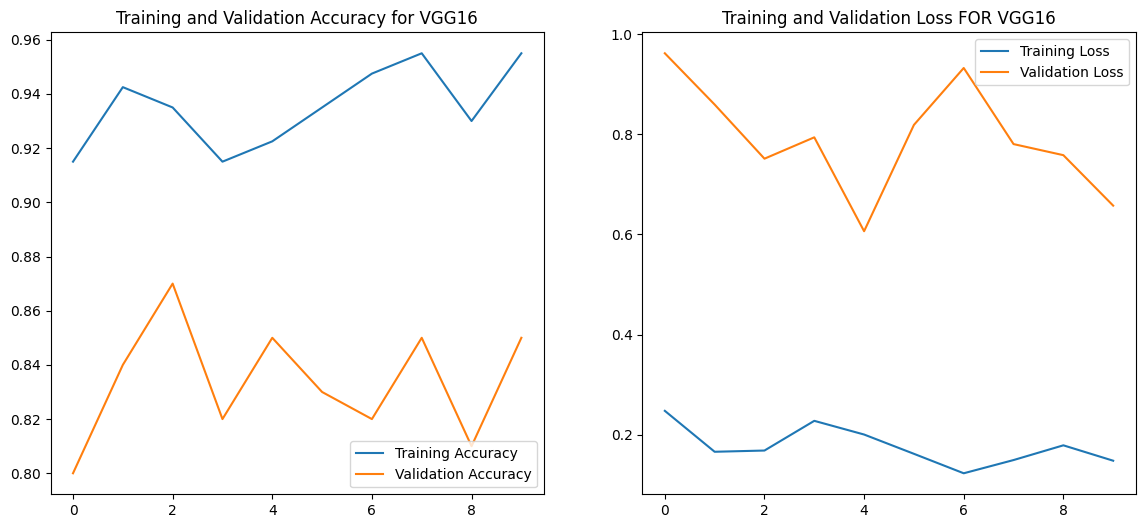

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for VGG16')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss FOR VGG16')
plt.show()

1/1 [==============================] - 0s 18ms/step


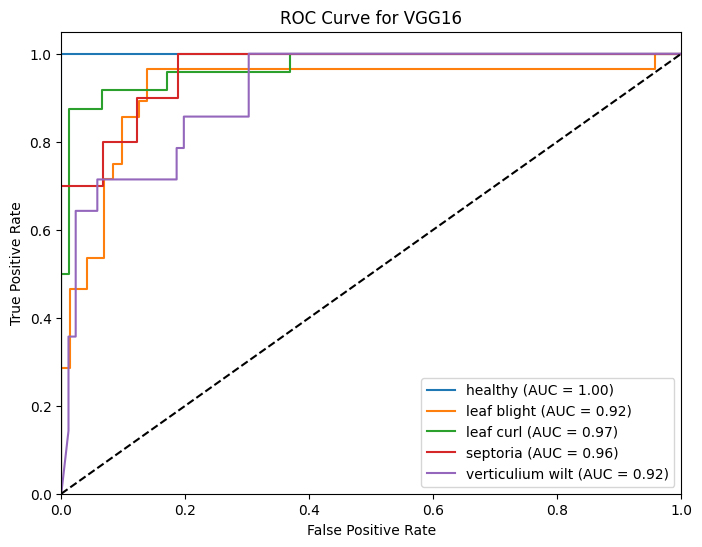

Classification Report FOR vgg16:
                  precision    recall  f1-score   support

         healthy       1.00      1.00      1.00        24
     leaf blight       0.75      0.75      0.75        28
       leaf curl       0.88      0.88      0.88        24
        septoria       0.78      0.70      0.74        10
verticulium wilt       0.67      0.71      0.69        14

        accuracy                           0.83       100
       macro avg       0.81      0.81      0.81       100
    weighted avg       0.83      0.83      0.83       100



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary mapping encoded labels to class names
label_map = {
    0: "healthy",
    1: "leaf blight",
    2: "leaf curl",
    3: "septoria",
    4: "verticulium wilt"
}

# Initialize empty lists to store predictions and true labels
all_y_pred = []
all_true_labels = []
y_pred_proba_all = []  # Store predicted probabilities for all samples

# Loop through each sample in the validation dataset
for i in range(len(image_data_val)):
    # Extract the sample image, symptoms text, and true label
    sample_image = np.expand_dims(image_data_val[i], axis=0)
    sample_text = np.expand_dims(symptoms_text_val[i], axis=0)
    true_label_encoded = target_disease_labels_encoded_val[i]

    # Make prediction for the sample
    y_pred_proba = model_VGG16.predict([sample_image, sample_text])
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Append the prediction and true label to the lists
    all_y_pred.append(y_pred[0])
    all_true_labels.append(true_label_encoded)
    y_pred_proba_all.append(y_pred_proba)

# Convert lists to numpy arrays
all_y_pred = np.array(all_y_pred)
all_true_labels = np.array(all_true_labels)
y_pred_proba_all = np.array(y_pred_proba_all)

# Generate classification report
classification_rep = classification_report(all_true_labels, all_y_pred, target_names=[label_map[i] for i in range(len(label_map))])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_pred_proba_all.shape[2]  # Number of classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((all_true_labels == i), y_pred_proba_all[:, :, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{label_map[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VGG16')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report FOR vgg16:")
print(classification_rep)


### Inception V3

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, models
from tensorflow.keras.applications.inception_v3 import InceptionV3


resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1./255),
])

def create_multimodal_model(image_shape, text_shape, num_classes):
    # Image input
    image_input = layers.Input(shape=image_shape)

    # Text input
    text_input = layers.Input(shape=text_shape)

    inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape=image_shape)
    inception_v3.trainable = False  # Freeze the pre-trained layers
    cnn_output = inception_v3(image_input)

    # Flatten CNN output
    cnn_output_flatten = layers.Flatten()(cnn_output)

    # Concatenate image features and text embeddings
    concat_features = layers.concatenate([cnn_output_flatten, text_input])

    # Fully connected layers for classification
    x = layers.Dense(256, activation='relu')(concat_features)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[image_input, text_input], outputs=output)
    return model

# Define input shapes and number of classes
image_shape = (224, 224, 3)
text_shape = (250,)
num_classes = 5

image_paths = plant_df['Image path'].tolist()
symptoms_text = plant_df['Generated Symptoms'].tolist()
target_disease_labels = plant_df['Disease Label'].tolist()

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        # Load image using OpenCV
        image = cv2.imread(path)
        # Resize the image to a fixed size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype('float32') / 255.0
        # Append the preprocessed image to the list
        images.append(image)
    return images

# Preprocess image data
image_data = load_images(image_paths)

# Preprocess text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(symptoms_text)
symptoms_text_sequences = tokenizer.texts_to_sequences(symptoms_text)
max_seq_length = 250  # Define the maximum sequence length
symptoms_text_padded = pad_sequences(symptoms_text_sequences, maxlen=max_seq_length)

# Encode target disease labels
label_encoder = LabelEncoder()
target_disease_labels_encoded = label_encoder.fit_transform(target_disease_labels)

# Split the data into training and validation sets
image_data_train, image_data_val, symptoms_text_train, symptoms_text_val, target_disease_labels_encoded_train, target_disease_labels_encoded_val = train_test_split(image_data, symptoms_text_padded, target_disease_labels_encoded, test_size=0.2, random_state=42)

# Create multimodal model
model_inceptionV3 = create_multimodal_model(image_shape, text_shape, num_classes)

# Compile the model
model_inceptionV3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Display model summary
model_inceptionV3.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 inception_v3 (Functional)   (None, 5, 5, 2048)           2180278   ['input_12[0][0]']            
                                                          4                                       
                                                                                                  
 flatten_5 (Flatten)         (None, 51200)                0         ['inception_v3[0][0]']        
                                                                                                  
 input_13 (InputLayer)       [(None, 250)]                0         []                      

In [ ]:
import numpy as np

# Convert lists to numpy arrays
image_data_train_np = np.array(image_data_train)
symptoms_text_train_np = np.array(symptoms_text_train)
target_disease_labels_encoded_train_np = np.array(target_disease_labels_encoded_train)

image_data_val_np = np.array(image_data_val)
symptoms_text_val_np = np.array(symptoms_text_val)
target_disease_labels_encoded_val_np = np.array(target_disease_labels_encoded_val)

# Ensure correct shapes
image_data_train_np = image_data_train_np.reshape(-1, 224, 224, 3)
symptoms_text_train_np = symptoms_text_train_np.reshape(-1, 250)

image_data_val_np = image_data_val_np.reshape(-1, 224, 224, 3)
symptoms_text_val_np = symptoms_text_val_np.reshape(-1, 250)


In [ ]:
history_inceptionV3 = model_inceptionV3.fit(
    x=[image_data_train_np, symptoms_text_train_np],
    y=target_disease_labels_encoded_train_np,
    epochs= 10,
    batch_size= 20,
    validation_data=([image_data_val_np, symptoms_text_val_np], target_disease_labels_encoded_val_np)
)

Epoch 1/10
20/20 [==============================] - 25s 356ms/step - loss: 23.5833 - accuracy: 0.4050 - val_loss: 4.5769 - val_accuracy: 0.7000
Epoch 2/10
20/20 [==============================] - 1s 72ms/step - loss: 4.7687 - accuracy: 0.7125 - val_loss: 1.6773 - val_accuracy: 0.7600
Epoch 3/10
20/20 [==============================] - 1s 71ms/step - loss: 1.0466 - accuracy: 0.7675 - val_loss: 0.9418 - val_accuracy: 0.7100
Epoch 4/10
20/20 [==============================] - 1s 71ms/step - loss: 0.5660 - accuracy: 0.8475 - val_loss: 0.8989 - val_accuracy: 0.7800
Epoch 5/10
20/20 [==============================] - 2s 80ms/step - loss: 0.4649 - accuracy: 0.8700 - val_loss: 1.0307 - val_accuracy: 0.7200
Epoch 6/10
20/20 [==============================] - 1s 72ms/step - loss: 0.4245 - accuracy: 0.9025 - val_loss: 0.9436 - val_accuracy: 0.7300
Epoch 7/10
20/20 [==============================] - 1s 69ms/step - loss: 0.3068 - accuracy: 0.8950 - val_loss: 0.9005 - val_accuracy: 0.7500
Epoch 8/10

In [ ]:
acc_inceptionV3= history_inceptionV3.history['accuracy']
val_acc_inceptionV3 = history_inceptionV3.history['val_accuracy']

loss_inceptionV3= history_inceptionV3.history['loss']
val_loss_inceptionV3= history_inceptionV3.history['val_loss']

1/1 [==============================] - 0s 25ms/step


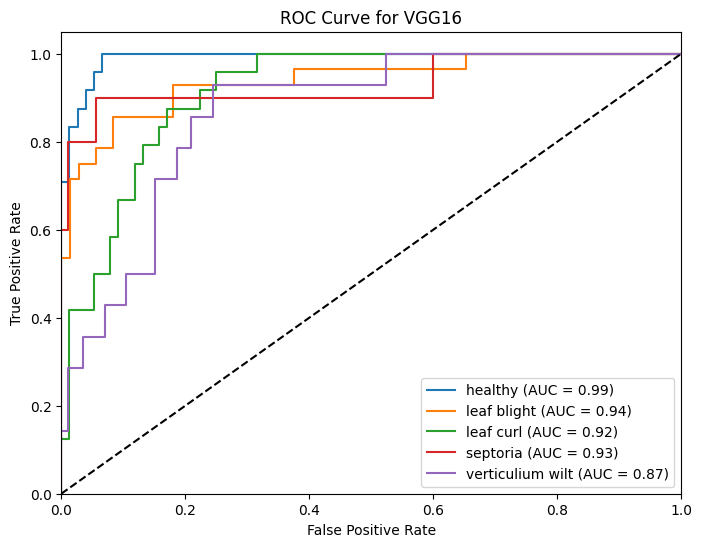

Classification Report for Inception V3:
                  precision    recall  f1-score   support

         healthy       0.85      0.96      0.90        24
     leaf blight       0.94      0.61      0.74        28
       leaf curl       0.67      0.50      0.57        24
        septoria       0.53      0.90      0.67        10
verticulium wilt       0.35      0.50      0.41        14

        accuracy                           0.68       100
       macro avg       0.67      0.69      0.66       100
    weighted avg       0.73      0.68      0.68       100



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary mapping encoded labels to class names
label_map = {
    0: "healthy",
    1: "leaf blight",
    2: "leaf curl",
    3: "septoria",
    4: "verticulium wilt"
}

# Initialize empty lists to store predictions and true labels
all_y_pred = []
all_true_labels = []
y_pred_proba_all = []  # Store predicted probabilities for all samples

# Loop through each sample in the validation dataset
for i in range(len(image_data_val)):
    # Extract the sample image, symptoms text, and true label
    sample_image = np.expand_dims(image_data_val[i], axis=0)
    sample_text = np.expand_dims(symptoms_text_val[i], axis=0)
    true_label_encoded = target_disease_labels_encoded_val[i]

    # Make prediction for the sample
    y_pred_proba = model_inceptionV3.predict([sample_image, sample_text])
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Append the prediction and true label to the lists
    all_y_pred.append(y_pred[0])
    all_true_labels.append(true_label_encoded)
    y_pred_proba_all.append(y_pred_proba)

# Convert lists to numpy arrays
all_y_pred = np.array(all_y_pred)
all_true_labels = np.array(all_true_labels)
y_pred_proba_all = np.array(y_pred_proba_all)

# Generate classification report
classification_rep = classification_report(all_true_labels, all_y_pred, target_names=[label_map[i] for i in range(len(label_map))])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_pred_proba_all.shape[2]  # Number of classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((all_true_labels == i), y_pred_proba_all[:, :, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{label_map[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VGG16')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report for Inception V3:")
print(classification_rep)


#### Custom CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, models

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224, 224),
  layers.experimental.preprocessing.Rescaling(1./255),
])
input_shape = (32, 224, 224, 3)
custom_cnn_model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax'),
    ])

def create_multimodal_model(image_shape, text_shape, num_classes):
    # Image input
    image_input = layers.Input(shape=image_shape)

    # Text input
    text_input = layers.Input(shape=text_shape)

    # Image feature extractor (e.g., Convolutional Neural Network)
    cnn_output = custom_cnn_model(image_input)

    # Flatten CNN output
    cnn_output_flatten = layers.Flatten()(cnn_output)

    # Concatenate image features and text embeddings
    concat_features = layers.concatenate([cnn_output_flatten, text_input])

    # Fully connected layers for classification
    x = layers.Dense(256, activation='relu')(concat_features)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[image_input, text_input], outputs=output)
    return model

# Define input shapes and number of classes
image_shape = (224, 224, 3)
text_shape = (250,)
num_classes = 5



image_paths = plant_df['Image path'].tolist()
symptoms_text = plant_df['Generated Symptoms'].tolist()
target_disease_labels = plant_df['Disease Label'].tolist()

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        # Load image using OpenCV
        image = cv2.imread(path)
        # Resize the image to a fixed size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype('float32') / 255.0
        # Append the preprocessed image to the list
        images.append(image)
    return images

# Preprocess image data
image_data = load_images(image_paths)

# Preprocess text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(symptoms_text)
symptoms_text_sequences = tokenizer.texts_to_sequences(symptoms_text)
max_seq_length = 250  # Define the maximum sequence length
symptoms_text_padded = pad_sequences(symptoms_text_sequences, maxlen=max_seq_length)

# Encode target disease labels
label_encoder = LabelEncoder()
target_disease_labels_encoded = label_encoder.fit_transform(target_disease_labels)

# Split the data into training and validation sets
image_data_train, image_data_val, symptoms_text_train, symptoms_text_val, target_disease_labels_encoded_train, target_disease_labels_encoded_val = train_test_split(image_data, symptoms_text_padded, target_disease_labels_encoded, test_size=0.2, random_state=42)

# Define input shapes and number of classes
image_shape = (224, 224, 3)
text_shape = (max_seq_length,)  # Use the maximum sequence length for text
num_classes = 5  # Define the number of classes

# Create multimodal model
model_custom_CNN = create_multimodal_model(image_shape, text_shape, num_classes)

# Compile the model
model_custom_CNN.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Display model summary
model_custom_CNN.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 sequential_4 (Sequential)   (None, 5)                    171589    ['input_7[0][0]']             
                                                                                                  
 flatten_3 (Flatten)         (None, 5)                    0         ['sequential_4[0][0]']        
                                                                                                  
 input_8 (InputLayer)        [(None, 250)]                0         []                            
                                                                                            

In [ ]:
import numpy as np

# Convert lists to numpy arrays
image_data_train_np = np.array(image_data_train)
symptoms_text_train_np = np.array(symptoms_text_train)
target_disease_labels_encoded_train_np = np.array(target_disease_labels_encoded_train)

image_data_val_np = np.array(image_data_val)
symptoms_text_val_np = np.array(symptoms_text_val)
target_disease_labels_encoded_val_np = np.array(target_disease_labels_encoded_val)

# Ensure correct shapes
image_data_train_np = image_data_train_np.reshape(-1, 224, 224, 3)
symptoms_text_train_np = symptoms_text_train_np.reshape(-1, 250)

image_data_val_np = image_data_val_np.reshape(-1, 224, 224, 3)
symptoms_text_val_np = symptoms_text_val_np.reshape(-1, 250)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


# Create an instance of EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, min_delta=0.001)

In [ ]:
history_custom_CNN = model_custom_CNN.fit(
    x=[image_data_train_np, symptoms_text_train_np],
    y=target_disease_labels_encoded_train_np,
    epochs= 10,
    batch_size= 20,
    validation_data=([image_data_val_np, symptoms_text_val_np], target_disease_labels_encoded_val_np)
)

Epoch 1/10
20/20 [==============================] - 9s 51ms/step - loss: 41.2631 - accuracy: 0.2800 - val_loss: 24.6295 - val_accuracy: 0.3200
Epoch 2/10
20/20 [==============================] - 1s 33ms/step - loss: 30.6163 - accuracy: 0.3650 - val_loss: 17.3109 - val_accuracy: 0.6200
Epoch 3/10
20/20 [==============================] - 1s 34ms/step - loss: 20.3905 - accuracy: 0.4800 - val_loss: 17.7356 - val_accuracy: 0.6200
Epoch 4/10
20/20 [==============================] - 1s 33ms/step - loss: 15.8606 - accuracy: 0.4875 - val_loss: 13.9334 - val_accuracy: 0.6300
Epoch 5/10
20/20 [==============================] - 1s 33ms/step - loss: 12.6464 - accuracy: 0.5500 - val_loss: 13.8647 - val_accuracy: 0.6800
Epoch 6/10
20/20 [==============================] - 1s 36ms/step - loss: 9.6617 - accuracy: 0.5950 - val_loss: 13.1965 - val_accuracy: 0.6900
Epoch 7/10
20/20 [==============================] - 1s 42ms/step - loss: 8.3329 - accuracy: 0.5850 - val_loss: 14.1690 - val_accuracy: 0.6800
E

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Define a dictionary mapping encoded labels to class names
label_map = {
    0: "healthy",
    1: "leaf blight",
    2: "leaf curl",
    3: "septoria",
    4: "verticulium wilt"
}

# Initialize empty lists to store predictions and true labels
all_y_pred = []
all_true_labels = []

# Loop through each sample in the validation dataset
for i in range(len(image_data_val)):
    # Extract the sample image, symptoms text, and true label
    sample_image = np.expand_dims(image_data_val[i], axis=0)
    sample_text = np.expand_dims(symptoms_text_val[i], axis=0)
    true_label_encoded = target_disease_labels_encoded_val[i]

    # Make prediction for the sample
    y_pred_proba = model.predict([sample_image, sample_text])
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Append the prediction and true label to the lists
    all_y_pred.append(y_pred[0])
    all_true_labels.append(true_label_encoded)

# Convert lists to numpy arrays
all_y_pred = np.array(all_y_pred)
all_true_labels = np.array(all_true_labels)

# Convert encoded labels to class names
all_true_labels_names = [label_map[label] for label in all_true_labels]
all_y_pred_names = [label_map[label] for label in all_y_pred]

# Generate classification report with class names
classification_rep = classification_report(all_true_labels_names, all_y_pred_names)

# Print classification report
print("Classification Report:")
print(classification_rep)


1/1 [==============================] - 0s 41ms/step
Classification Report:
                  precision    recall  f1-score   support

         healthy       0.92      0.92      0.92        24
     leaf blight       0.76      0.68      0.72        28
       leaf curl       0.73      0.79      0.76        24
        septoria       0.46      0.60      0.52        10
verticulium wilt       0.67      0.57      0.62        14

        accuracy                           0.74       100
       macro avg       0.71      0.71      0.71       100
    weighted avg       0.75      0.74      0.74       100



1/1 [==============================] - 0s 32ms/step


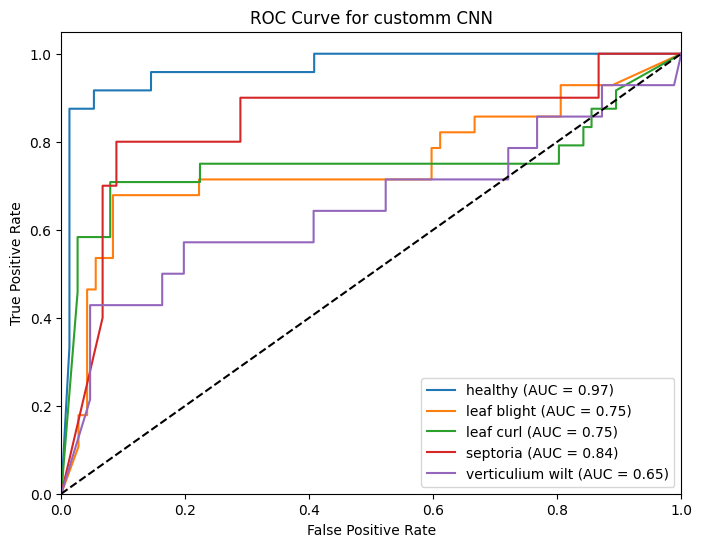

Classification Report:
                  precision    recall  f1-score   support

         healthy       0.95      0.88      0.91        24
     leaf blight       0.74      0.61      0.67        28
       leaf curl       0.74      0.71      0.72        24
        septoria       0.42      0.80      0.55        10
verticulium wilt       0.46      0.43      0.44        14

        accuracy                           0.69       100
       macro avg       0.66      0.68      0.66       100
    weighted avg       0.72      0.69      0.70       100



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary mapping encoded labels to class names
label_map = {
    0: "healthy",
    1: "leaf blight",
    2: "leaf curl",
    3: "septoria",
    4: "verticulium wilt"
}

# Initialize empty lists to store predictions and true labels
all_y_pred = []
all_true_labels = []
y_pred_proba_all = []  # Store predicted probabilities for all samples

# Loop through each sample in the validation dataset
for i in range(len(image_data_val)):
    # Extract the sample image, symptoms text, and true label
    sample_image = np.expand_dims(image_data_val[i], axis=0)
    sample_text = np.expand_dims(symptoms_text_val[i], axis=0)
    true_label_encoded = target_disease_labels_encoded_val[i]

    # Make prediction for the sample
    y_pred_proba = model_custom_CNN.predict([sample_image, sample_text])
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Append the prediction and true label to the lists
    all_y_pred.append(y_pred[0])
    all_true_labels.append(true_label_encoded)
    y_pred_proba_all.append(y_pred_proba)

# Convert lists to numpy arrays
all_y_pred = np.array(all_y_pred)
all_true_labels = np.array(all_true_labels)
y_pred_proba_all = np.array(y_pred_proba_all)

# Generate classification report
classification_rep = classification_report(all_true_labels, all_y_pred, target_names=[label_map[i] for i in range(len(label_map))])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_pred_proba_all.shape[2]  # Number of classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((all_true_labels == i), y_pred_proba_all[:, :, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{label_map[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for customm CNN')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_rep)


### Evaluation

In [ ]:
acc_custom_CNN = history_custom_CNN.history['accuracy']
val_acc_custom_CNN = history_custom_CNN.history['val_accuracy']

loss_custom_CNN = history_custom_CNN.history['loss']
val_loss_custom_CNN = history_custom_CNN.history['val_loss']

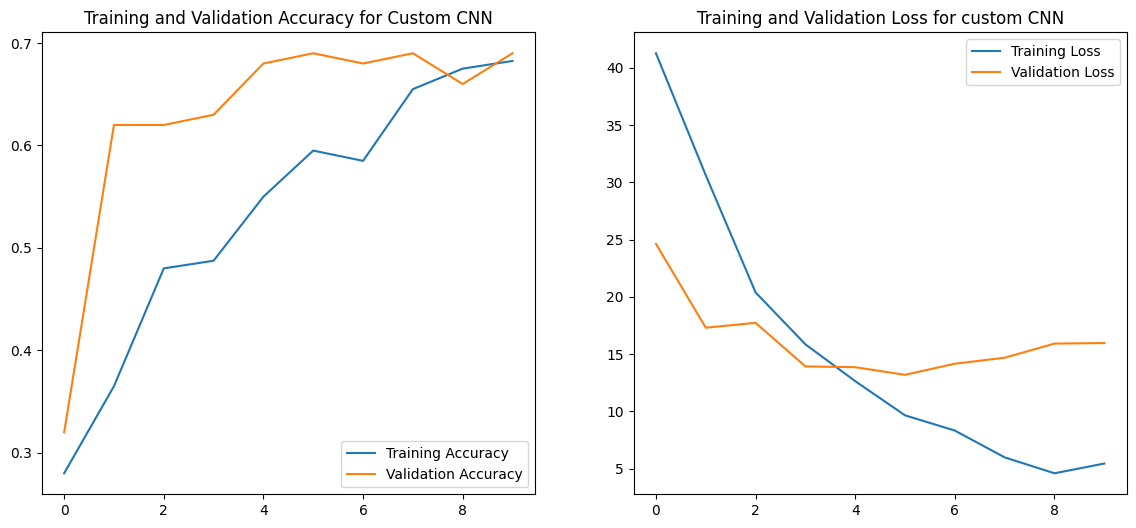

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc_custom_CNN, label='Training Accuracy')
plt.plot(range(10), val_acc_custom_CNN, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for Custom CNN')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss_custom_CNN, label='Training Loss')
plt.plot(range(10), val_loss_custom_CNN, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for custom CNN')
plt.show()

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate([image_data_val_np, symptoms_text_val_np], target_disease_labels_encoded_val_np)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


4/4 [==============================] - 3s 540ms/step - loss: 11.0293 - accuracy: 0.7400
Validation Loss: 11.02929401397705
Validation Accuracy: 0.7400000095367432


### DenseNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, models
from tensorflow.keras.applications.densenet import DenseNet121

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1./255),
])

def create_multimodal_model(image_shape, text_shape, num_classes):
    # Image input
    image_input = layers.Input(shape=image_shape)

    # Text input
    text_input = layers.Input(shape=text_shape)

    densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=image_shape)
    densenet121.trainable = False
    cnn_output = densenet121(image_input)

    # Flatten CNN output
    cnn_output_flatten = layers.Flatten()(cnn_output)

    # Concatenate image features and text embeddings
    concat_features = layers.concatenate([cnn_output_flatten, text_input])

    # Fully connected layers for classification
    x = layers.Dense(256, activation='relu')(concat_features)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[image_input, text_input], outputs=output)
    return model

# Define input shapes and number of classes
image_shape = (224, 224, 3)
text_shape = (250,)
num_classes = 5

image_paths = plant_df['Image path'].tolist()
symptoms_text = plant_df['Generated Symptoms'].tolist()
target_disease_labels = plant_df['Disease Label'].tolist()

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        # Load image using OpenCV
        image = cv2.imread(path)
        # Resize the image to a fixed size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype('float32') / 255.0
        # Append the preprocessed image to the list
        images.append(image)
    return images

# Preprocess image data
image_data = load_images(image_paths)

# Preprocess text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(symptoms_text)
symptoms_text_sequences = tokenizer.texts_to_sequences(symptoms_text)
max_seq_length = 250  # Define the maximum sequence length
symptoms_text_padded = pad_sequences(symptoms_text_sequences, maxlen=max_seq_length)

# Encode target disease labels
label_encoder = LabelEncoder()
target_disease_labels_encoded = label_encoder.fit_transform(target_disease_labels)

# Split the data into training and validation sets
image_data_train, image_data_val, symptoms_text_train, symptoms_text_val, target_disease_labels_encoded_train, target_disease_labels_encoded_val = train_test_split(image_data, symptoms_text_padded, target_disease_labels_encoded, test_size=0.2, random_state=42)

# Create multimodal model
model_denseNet = create_multimodal_model(image_shape, text_shape, num_classes)

# Compile the model
model_denseNet.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Display model summary
model_denseNet.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 densenet121 (Functional)    (None, 7, 7, 1024)           7037504   ['input_1[0][0]']             
                                                                                                  
 flatten (Flatten)           (None, 50176)                0         ['densenet121[0][0]']         
                                                                                                  
 input_2 (InputLayer)        [(None, 250)]                0         []                            
                             

In [ ]:
import numpy as np

# Convert lists to numpy arrays
image_data_train_np = np.array(image_data_train)
symptoms_text_train_np = np.array(symptoms_text_train)
target_disease_labels_encoded_train_np = np.array(target_disease_labels_encoded_train)

image_data_val_np = np.array(image_data_val)
symptoms_text_val_np = np.array(symptoms_text_val)
target_disease_labels_encoded_val_np = np.array(target_disease_labels_encoded_val)

# Ensure correct shapes
image_data_train_np = image_data_train_np.reshape(-1, 224, 224, 3)
symptoms_text_train_np = symptoms_text_train_np.reshape(-1, 250)

image_data_val_np = image_data_val_np.reshape(-1, 224, 224, 3)
symptoms_text_val_np = symptoms_text_val_np.reshape(-1, 250)

In [ ]:
history_denseNet = model_denseNet.fit(
    x=[image_data_train_np, symptoms_text_train_np],
    y=target_disease_labels_encoded_train_np,
    epochs= 10,
    batch_size= 20,
    validation_data=([image_data_val_np, symptoms_text_val_np], target_disease_labels_encoded_val_np)
)

Epoch 1/10
20/20 [==============================] - 2s 98ms/step - loss: 0.2476 - accuracy: 0.9150 - val_loss: 0.9619 - val_accuracy: 0.8000
Epoch 2/10
20/20 [==============================] - 2s 106ms/step - loss: 0.1658 - accuracy: 0.9425 - val_loss: 0.8595 - val_accuracy: 0.8400
Epoch 3/10
20/20 [==============================] - 2s 87ms/step - loss: 0.1682 - accuracy: 0.9350 - val_loss: 0.7513 - val_accuracy: 0.8700
Epoch 4/10
20/20 [==============================] - 2s 106ms/step - loss: 0.2276 - accuracy: 0.9150 - val_loss: 0.7940 - val_accuracy: 0.8200
Epoch 5/10
20/20 [==============================] - 2s 91ms/step - loss: 0.2002 - accuracy: 0.9225 - val_loss: 0.6064 - val_accuracy: 0.8500
Epoch 6/10
20/20 [==============================] - 2s 114ms/step - loss: 0.1617 - accuracy: 0.9350 - val_loss: 0.8188 - val_accuracy: 0.8300
Epoch 7/10
20/20 [==============================] - 3s 133ms/step - loss: 0.1228 - accuracy: 0.9475 - val_loss: 0.9326 - val_accuracy: 0.8200
Epoch 8/1

In [ ]:
acc_denseNet = history_denseNet.history['accuracy']
val_acc_denseNet = history_denseNet.history['val_accuracy']

loss_denseNet = history_denseNet.history['loss']
val_loss_denseNet = history_denseNet.history['val_loss']

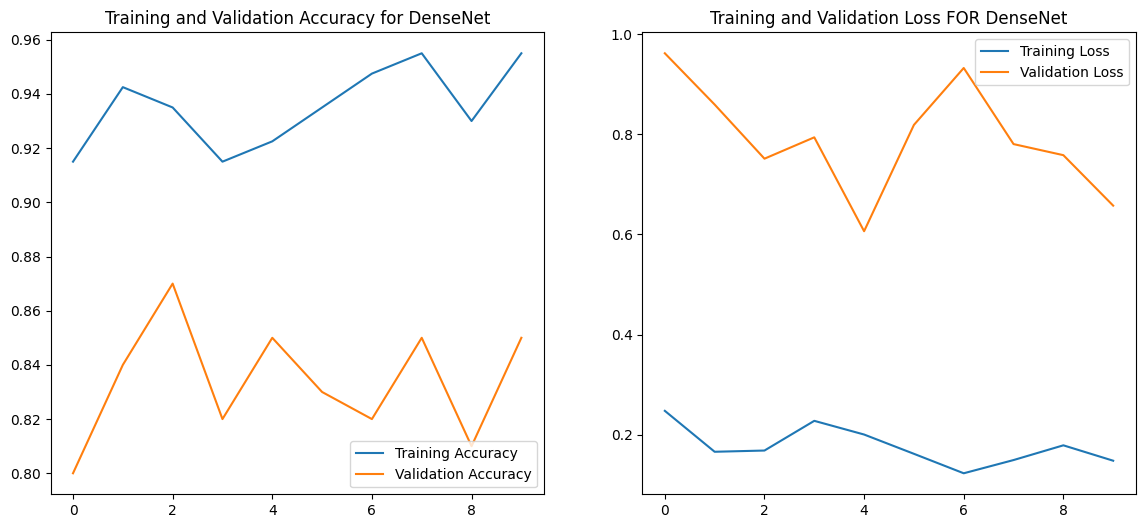

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for DenseNet')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss FOR DenseNet')
plt.show()

1/1 [==============================] - 0s 45ms/step


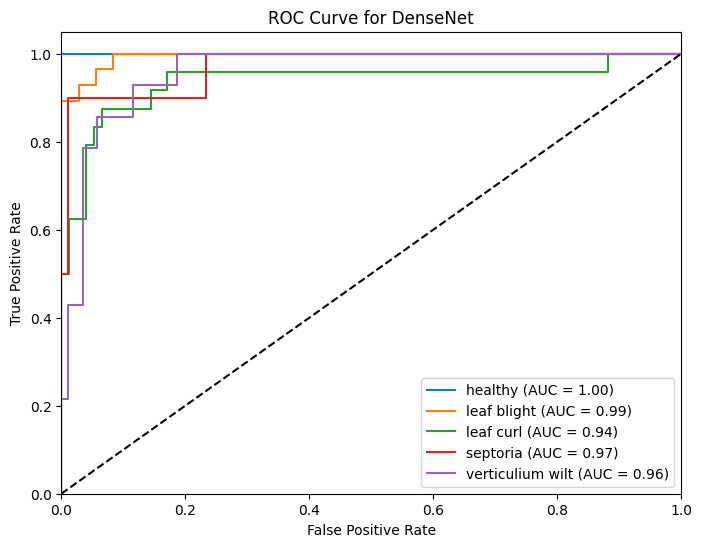

Classification Report FOR DenseNet:
                  precision    recall  f1-score   support

         healthy       0.96      1.00      0.98        24
     leaf blight       0.96      0.89      0.93        28
       leaf curl       0.84      0.67      0.74        24
        septoria       0.89      0.80      0.84        10
verticulium wilt       0.57      0.86      0.69        14

        accuracy                           0.85       100
       macro avg       0.84      0.84      0.84       100
    weighted avg       0.87      0.85      0.85       100



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary mapping encoded labels to class names
label_map = {
    0: "healthy",
    1: "leaf blight",
    2: "leaf curl",
    3: "septoria",
    4: "verticulium wilt"
}

# Initialize empty lists to store predictions and true labels
all_y_pred = []
all_true_labels = []
y_pred_proba_all = []  # Store predicted probabilities for all samples

# Loop through each sample in the validation dataset
for i in range(len(image_data_val)):
    # Extract the sample image, symptoms text, and true label
    sample_image = np.expand_dims(image_data_val[i], axis=0)
    sample_text = np.expand_dims(symptoms_text_val[i], axis=0)
    true_label_encoded = target_disease_labels_encoded_val[i]

    # Make prediction for the sample
    y_pred_proba = model_denseNet.predict([sample_image, sample_text])
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Append the prediction and true label to the lists
    all_y_pred.append(y_pred[0])
    all_true_labels.append(true_label_encoded)
    y_pred_proba_all.append(y_pred_proba)

# Convert lists to numpy arrays
all_y_pred = np.array(all_y_pred)
all_true_labels = np.array(all_true_labels)
y_pred_proba_all = np.array(y_pred_proba_all)

# Generate classification report
classification_rep = classification_report(all_true_labels, all_y_pred, target_names=[label_map[i] for i in range(len(label_map))])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_pred_proba_all.shape[2]  # Number of classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((all_true_labels == i), y_pred_proba_all[:, :, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{label_map[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DenseNet')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report FOR DenseNet:")
print(classification_rep)


                  precision    recall  f1-score  support
healthy            0.960000  1.000000  0.979592    24.00
leaf blight        0.961538  0.892857  0.925926    28.00
leaf curl          0.842105  0.666667  0.744186    24.00
septoria           0.888889  0.800000  0.842105    10.00
verticulium wilt   0.571429  0.857143  0.685714    14.00
accuracy           0.850000  0.850000  0.850000     0.85
macro avg          0.844792  0.843333  0.835505   100.00
weighted avg       0.870625  0.850000  0.853176   100.00


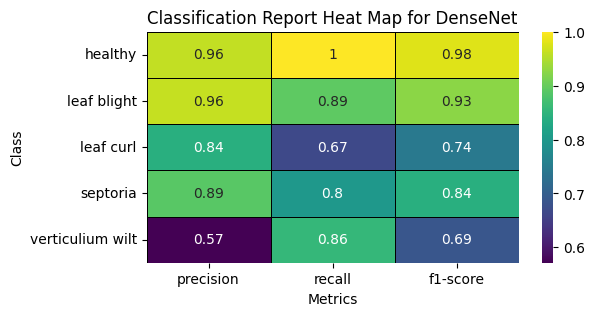

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Assume you have the true labels and predicted labels
# true_labels and predicted_labels are lists or arrays containing the true and predicted labels

# Generate classification report
classification_rep = classification_report(all_true_labels, all_y_pred, target_names=[label_map[i] for i in range(len(label_map))], output_dict=True)

# Convert the classification report to a DataFrame and transpose it
classification_df = pd.DataFrame(classification_rep).T

# Check the DataFrame format and content
print(classification_df)

# Remove the 'support' column, 'accuracy' row, and 'weighted avg' row from the DataFrame
classification_df = classification_df.drop(columns=['support'])
classification_df = classification_df.drop(index=['macro avg','accuracy', 'weighted avg'])

# Plot the heat map
plt.figure(figsize=(6, 3))

# Use a different color map (e.g., 'viridis', 'plasma', 'coolwarm', 'cividis')
sns.heatmap(classification_df.astype(float), annot=True, cmap='viridis', linewidths=0.5, linecolor='black')

# Set title and labels
plt.title('Classification Report Heat Map for DenseNet')
plt.ylabel('Class')
plt.xlabel('Metrics')

# Set y-axis labels horizontally (rotation = 0)
plt.yticks(rotation=0)

# Display the heat map
plt.show()


### PCA

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, models
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224, 224),
  layers.experimental.preprocessing.Rescaling(1./255),
])
input_shape = (32, 224, 224, 3)
custom_cnn_model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax'),
    ])

def create_multimodal_model(image_shape, text_shape, num_classes):
    # Image input
    image_input = layers.Input(shape=image_shape)

    # Text input
    text_input = layers.Input(shape=text_shape)

    # Flatten PCA-transformed image features
    image_features = layers.Flatten()(image_input)

    # Concatenate image features and text embeddings
    concat_features = layers.concatenate([image_features, text_input])

    # Fully connected layers for classification
    x = layers.Dense(256, activation='relu')(concat_features)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[image_input, text_input], outputs=output)
    return model



# Define input shapes and number of classes
image_shape = (250,)  # Shape of PCA-transformed image data
text_shape = (250,)   # Shape of text data
num_classes = 5       # Number of classes

image_paths = plant_df['Image path'].tolist()
symptoms_text = plant_df['Generated Symptoms'].tolist()
target_disease_labels = plant_df['Disease Label'].tolist()

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        # Load image using OpenCV
        image = cv2.imread(path)
        # Resize the image to a fixed size (e.g., 224x224)
        image = cv2.resize(image, (224, 224))
        # Normalize the pixel values to the range [0, 1]
        image = image.astype('float32') / 255.0
        # Append the preprocessed image to the list
        images.append(image)
    return images

# Preprocess image data
image_data = load_images(image_paths)

# Preprocess text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(symptoms_text)
symptoms_text_sequences = tokenizer.texts_to_sequences(symptoms_text)
max_seq_length = 250  # Define the maximum sequence length
symptoms_text_padded = pad_sequences(symptoms_text_sequences, maxlen=max_seq_length)

# Encode target disease labels
label_encoder = LabelEncoder()
target_disease_labels_encoded = label_encoder.fit_transform(target_disease_labels)

# Split the data into training and validation sets
image_data_train, image_data_val, symptoms_text_train, symptoms_text_val, target_disease_labels_encoded_train, target_disease_labels_encoded_val = train_test_split(image_data, symptoms_text_padded, target_disease_labels_encoded, test_size=0.2, random_state=42)

# Define input shapes and number of classes
image_shape = (224, 224, 3)
text_shape = (max_seq_length,)  # Use the maximum sequence length for text
num_classes = 5  # Define the number of classes

# Function to apply PCA to image data
def apply_pca_to_images(image_data, n_components):
    pca = PCA(n_components=n_components)
    # Reshape image data for PCA
    flattened_images = np.array([image.flatten() for image in image_data])
    # Fit PCA on flattened images
    pca.fit(flattened_images)
    # Transform image data using PCA
    transformed_images = pca.transform(flattened_images)
    # Reshape back to original shape
    transformed_images = transformed_images.reshape(-1, n_components)
    return transformed_images

# Function to apply PCA to text data
def apply_pca_to_text(text_data, n_components):
    pca = PCA(n_components=n_components)
    # Fit PCA on text data
    pca.fit(text_data)
    # Transform text data using PCA
    transformed_text = pca.transform(text_data)
    return transformed_text

# Define the number of PCA components for image and text data
n_components_image = 90  # You can adjust this based on the amount of variance you want to retain
n_components_text = 90  # You can adjust this based on the amount of variance you want to retain

# Apply PCA to image data
transformed_image_data_train = apply_pca_to_images(image_data_train, n_components_image)
transformed_image_data_val = apply_pca_to_images(image_data_val, n_components_image)

# Apply PCA to text data
transformed_text_data_train = apply_pca_to_text(symptoms_text_train, n_components_text)
transformed_text_data_val = apply_pca_to_text(symptoms_text_val, n_components_text)

# Define input shapes for the multimodal model with PCA
# Define input shapes for the multimodal model with PCA
image_shape_pca = (90,)  # Update with correct image dimensions
text_shape_pca = (90,)   # Update with correct text dimensions

# Create multimodal model with PCA-transformed data
model_with_pca = create_multimodal_model(image_shape_pca, text_shape_pca, num_classes)
  # Update with correct text dimensions


# Create multimodal model with PCA-transformed data
model_with_pca = create_multimodal_model(image_shape_pca, text_shape_pca, num_classes)

# Compile the model
model_with_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model_with_pca.summary()




Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_39 (InputLayer)       [(None, 90)]                 0         []                            
                                                                                                  
 flatten_38 (Flatten)        (None, 90)                   0         ['input_39[0][0]']            
                                                                                                  
 input_40 (InputLayer)       [(None, 90)]                 0         []                            
                                                                                                  
 concatenate_18 (Concatenat  (None, 180)                  0         ['flatten_38[0][0]',          
 e)                                                                  'input_40[0][0]']     

In [ ]:
transformed_text_data_train.shape

(400, 100)

In [ ]:
transformed_image_data_train.shape

(400, 100)

In [ ]:
print("Shape of transformed_image_data_train:", transformed_image_data_train.shape)
print("Shape of transformed_text_data_train:", transformed_text_data_train.shape)
print("Shape of target_disease_labels_encoded_train:", target_disease_labels_encoded_train.shape)

print("Shape of transformed_image_data_val:", transformed_image_data_val.shape)
print("Shape of transformed_text_data_val:", transformed_text_data_val.shape)
print("Shape of target_disease_labels_encoded_val:", target_disease_labels_encoded_val.shape)


Shape of transformed_image_data_train: (400, 95)
Shape of transformed_text_data_train: (400, 95)
Shape of target_disease_labels_encoded_train: (400,)
Shape of transformed_image_data_val: (100, 95)
Shape of transformed_text_data_val: (100, 95)
Shape of target_disease_labels_encoded_val: (100,)


In [ ]:
# Train the model
history = model_with_pca.fit(
    [transformed_image_data_train, transformed_text_data_train],  # Training data
    target_disease_labels_encoded_train,  # Target labels
    epochs= 15,                             # Number of epochs
    batch_size=32,                        # Batch size
    validation_data=([transformed_image_data_val, transformed_text_data_val],  # Validation data
                     target_disease_labels_encoded_val)  # Validation labels
)


Epoch 1/15
13/13 [==============================] - 0s 11ms/step - loss: 3.8271 - accuracy: 0.8125 - val_loss: 28.6929 - val_accuracy: 0.3100
Epoch 2/15
13/13 [==============================] - 0s 6ms/step - loss: 3.1720 - accuracy: 0.8300 - val_loss: 27.6258 - val_accuracy: 0.3400
Epoch 3/15
13/13 [==============================] - 0s 5ms/step - loss: 2.6969 - accuracy: 0.8675 - val_loss: 27.6706 - val_accuracy: 0.3400
Epoch 4/15
13/13 [==============================] - 0s 5ms/step - loss: 2.5937 - accuracy: 0.8700 - val_loss: 28.1402 - val_accuracy: 0.3200
Epoch 5/15
13/13 [==============================] - 0s 5ms/step - loss: 3.7823 - accuracy: 0.8550 - val_loss: 28.0819 - val_accuracy: 0.3200
Epoch 6/15
13/13 [==============================] - 0s 8ms/step - loss: 3.1629 - accuracy: 0.8625 - val_loss: 28.4065 - val_accuracy: 0.3300
Epoch 7/15
13/13 [==============================] - 0s 5ms/step - loss: 1.7931 - accuracy: 0.9025 - val_loss: 28.6802 - val_accuracy: 0.3200
Epoch 8/15
1

In [ ]:
# Initialize empty lists to store predictions and true labels
all_y_pred = []
all_true_labels = []

# Loop through each sample in the validation dataset
for i in range(len(transformed_image_data_val)):
    # Extract the sample image, symptoms text, and true label
    sample_image = np.expand_dims(transformed_image_data_val[i], axis=0)
    sample_text = np.expand_dims(transformed_text_data_val[i], axis=0)
    true_label_encoded = target_disease_labels_encoded_val[i]

    # Make prediction for the sample
    y_pred_proba = model_with_pca.predict([sample_image, sample_text])
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Append the prediction and true label to the lists
    all_y_pred.append(y_pred[0])
    all_true_labels.append(true_label_encoded)

# Convert lists to numpy arrays
all_y_pred = np.array(all_y_pred)
all_true_labels = np.array(all_true_labels)

# Convert encoded labels to class names
all_true_labels_names = [label_map[label] for label in all_true_labels]
all_y_pred_names = [label_map[label] for label in all_y_pred]

# Generate classification report with class names
classification_rep = classification_report(all_true_labels_names, all_y_pred_names)

# Print classification report
print("Classification Report:")
print(classification_rep)


1/1 [==============================] - 0s 145ms/step
Classification Report:
                  precision    recall  f1-score   support

         healthy       0.56      0.42      0.48        24
     leaf blight       0.14      0.07      0.10        28
       leaf curl       0.38      0.54      0.45        24
        septoria       0.18      0.40      0.25        10
verticulium wilt       0.33      0.29      0.31        14

        accuracy                           0.33       100
       macro avg       0.32      0.34      0.32       100
    weighted avg       0.33      0.33      0.32       100



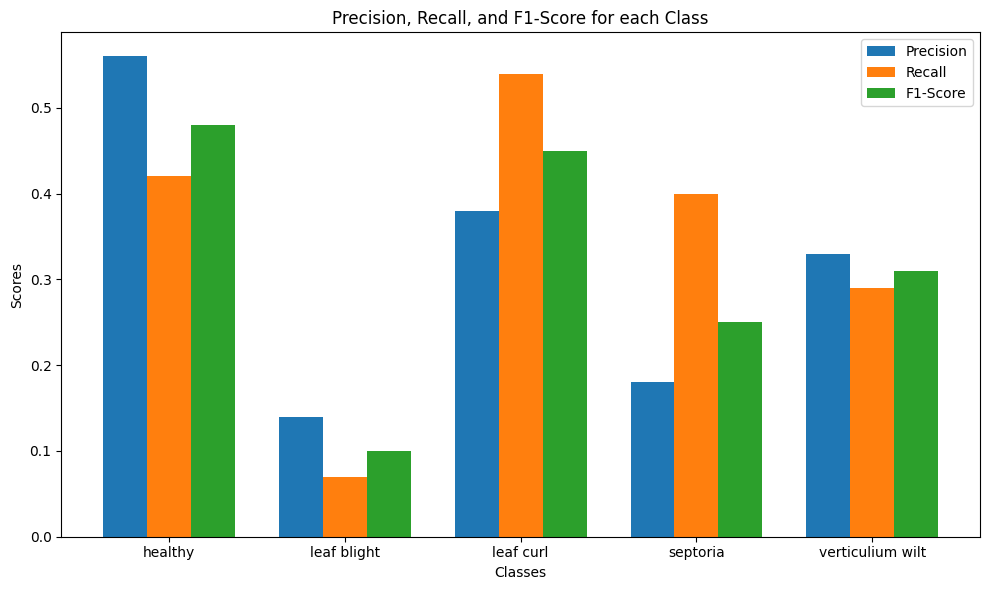

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ["healthy", "leaf blight", "leaf curl", "septoria", "verticulium wilt"]

# Define precision, recall, and F1-score for each class
precision = [0.56, 0.14, 0.38, 0.18, 0.33]
recall = [0.42, 0.07, 0.54, 0.40, 0.29]
f1_score = [0.48, 0.10, 0.45, 0.25, 0.31]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.25

# Set up the x-axis locations
index = np.arange(len(class_names))

# Plot precision, recall, and F1-score
precision_bar = ax.bar(index - bar_width, precision, bar_width, label='Precision')
recall_bar = ax.bar(index, recall, bar_width, label='Recall')
f1_score_bar = ax.bar(index + bar_width, f1_score, bar_width, label='F1-Score')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for each Class')
ax.set_xticks(index)
ax.set_xticklabels(class_names)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 22ms/step


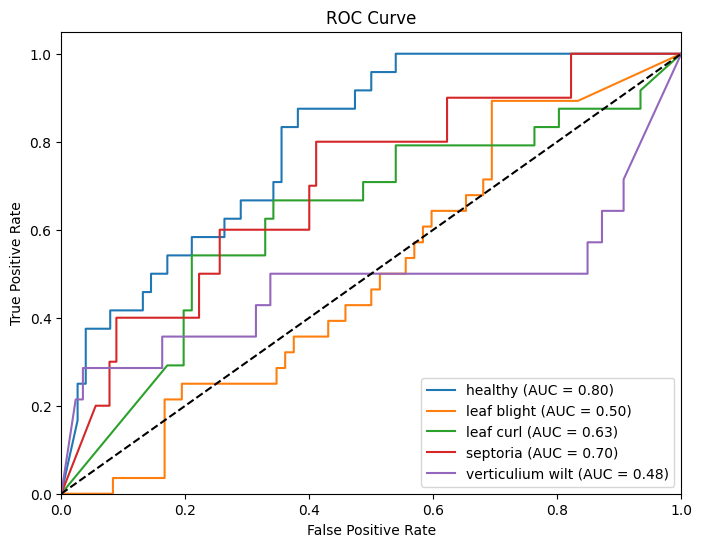

Classification Report:
                  precision    recall  f1-score   support

         healthy       0.56      0.42      0.48        24
     leaf blight       0.14      0.07      0.10        28
       leaf curl       0.38      0.54      0.45        24
        septoria       0.18      0.40      0.25        10
verticulium wilt       0.33      0.29      0.31        14

        accuracy                           0.33       100
       macro avg       0.32      0.34      0.32       100
    weighted avg       0.33      0.33      0.32       100



In [ ]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary mapping encoded labels to class names
label_map = {
    0: "healthy",
    1: "leaf blight",
    2: "leaf curl",
    3: "septoria",
    4: "verticulium wilt"
}

# Initialize empty lists to store predictions and true labels
all_y_pred = []
all_true_labels = []
y_pred_proba_all = []  # Store predicted probabilities for all samples

# Loop through each sample in the validation dataset
for i in range(len(transformed_image_data_val)):
    # Extract the sample image, symptoms text, and true label
    sample_image = np.expand_dims(transformed_image_data_val[i], axis=0)
    sample_text = np.expand_dims(transformed_text_data_val[i], axis=0)
    true_label_encoded = target_disease_labels_encoded_val[i]

    # Make prediction for the sample
    y_pred_proba = model_with_pca.predict([sample_image, sample_text])
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Append the prediction and true label to the lists
    all_y_pred.append(y_pred[0])
    all_true_labels.append(true_label_encoded)
    y_pred_proba_all.append(y_pred_proba)

# Convert lists to numpy arrays
all_y_pred = np.array(all_y_pred)
all_true_labels = np.array(all_true_labels).reshape(-1)  # Reshape to 1D array
y_pred_proba_all = np.array(y_pred_proba_all)

# Generate classification report
classification_rep = classification_report(all_true_labels, all_y_pred, target_names=[label_map[i] for i in range(len(label_map))])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_pred_proba_all.shape[2]  # Number of classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((all_true_labels == i), y_pred_proba_all[:, :, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{label_map[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_rep)


### Load H5 MOdel

In [ ]:
from tensorflow.keras.models import load_model

# Define the path to the model file
model_path = '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/custom_model_1.h5'

# Load the model
model_cnn = load_model(model_path)

# Display model summary
model_cnn.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (224, 224, 3)             0         
                                                                 
 conv2d_29 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 52, 52, 64)      

In [ ]:
print("Image shape:", img.shape)


Image shape: (256, 256, 3)


In [ ]:
### HeatMap

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf

def make_gradcam_heatmap(img_array, text_array, model):
    img_array = np.expand_dims(img_array, axis=0)
    text_array = np.expand_dims(text_array, axis=0)

    # Get the last convolutional layer
    last_conv_layer = None
    for layer in model.layers[::-1]:
        if 'conv' in layer.name:
            last_conv_layer = layer
            break

    if last_conv_layer is None:
        raise ValueError("No convolutional layer found in the model.")

    # Check input shape
    expected_input_shape = last_conv_layer.input_shape[1:]
    if img_array.shape[1:] != expected_input_shape[:2]:
        raise ValueError(f"Expected input shape: {expected_input_shape}, got: {img_array.shape[1:]}")

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs = model([img_array, text_array], training=False)
        target_class_idx = tf.argmax(conv_outputs[0])
        output = conv_outputs[:, target_class_idx]

    # Get gradients
    grads = tape.gradient(output, last_conv_layer.output)[0]

    # Compute CAM
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    cam = tf.reduce_sum(tf.multiply(pooled_grads, last_conv_layer.output[0]), axis=-1)

    return cam.numpy()

# Example usage:
img_index = 0  # Index of the image in the validation set
img_array = image_data_val[img_index]
text_array = symptoms_text_val[img_index]

# Generate heatmap
heatmap = make_gradcam_heatmap(img_array, text_array, model)

# Display the heatmap overlayed on the original image
display_gradcam(img_array, heatmap)


ValueError: No convolutional layer found in the model.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target disease labels
label_encoder = LabelEncoder()
target_disease_labels_encoded = label_encoder.fit_transform(target_disease_labels)

# Get the actual class names
class_names = label_encoder.classes_

# Print class names and their encoded values
for i, class_name in enumerate(class_names):
    print(f"Class '{class_name}' has encoded value {i}")


Class 'healthy' has encoded value 0
Class 'leaf blight' has encoded value 1
Class 'leaf curl' has encoded value 2
Class 'septoria' has encoded value 3
Class 'verticulium wilt' has encoded value 4


### Testing prediction on a sample image

1/1 [==============================] - 0s 381ms/step
Symptoms:  ['the symptoms of diseases in tomato plant leaf image are the leaves are curled upwards and inwards the leaves are yellowing the leaves are wilting the leaves are dropping off']


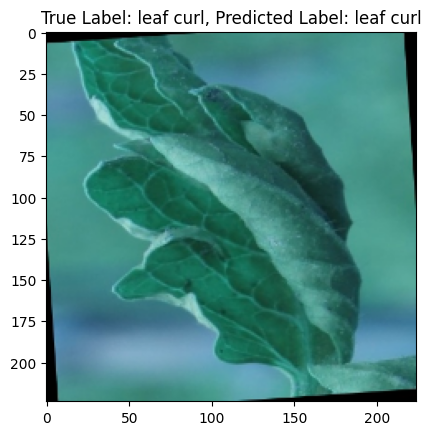

In [ ]:
## Testing the prediction on a sample image
import matplotlib.pyplot as plt
import numpy as np

# Choose a sample index from the validation set
sample_index = 25

# Extract the sample image, symptoms text, and true label from the validation set
sample_image = image_data_val[sample_index]
sample_text = symptoms_text_val[sample_index]
true_label_encoded = target_disease_labels_encoded_val[sample_index]

# Reshape the image and symptoms text
sample_image = np.expand_dims(sample_image, axis=0)
sample_text = np.expand_dims(sample_text, axis=0)

# Make a prediction
prediction = model.predict([sample_image, sample_text])

# Decode the prediction and true label
predicted_label_encoded = np.argmax(prediction)
true_label = label_encoder.inverse_transform([true_label_encoded])[0]
predicted_label = label_encoder.inverse_transform([predicted_label_encoded])[0]

# Display the sample image and its true and predicted labels
plt.imshow(sample_image[0])
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
symptoms = [tokenizer.sequences_to_texts([sequence])[0] for sequence in sample_text]
print("Symptoms: ", symptoms)
plt.show()


### Generating symptoms and predict disease class using image as input

In [ ]:
def get_generated_symptoms(image_path):
    # Check if the image path exists in the DataFrame
    if image_path in plant_df['Image path'].values:
        # Retrieve the row corresponding to the image path
        row = plant_df[plant_df['Image path'] == image_path]
        # Get the generated symptoms from the row
        generated_symptoms = row['Generated Symptoms'].values[0]
        return generated_symptoms
    else:
        return None

def get_true_label(image_path):
    # Check if the image path exists in the DataFrame
    if image_path in plant_df['Image path'].values:
        # Retrieve the row corresponding to the image path
        row = plant_df[plant_df['Image path'] == image_path]
        # Get the generated symptoms from the row
        generated_symptoms = row['Disease Label'].values[0]
        return generated_symptoms
    else:
        return None
def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            # Load image using OpenCV
            image = cv2.imread(path)
            if image is not None:
                # Resize the image to a fixed size (e.g., 224x224)
                image = cv2.resize(image, (224, 224))
                # Normalize the pixel values to the range [0, 1]
                image = image.astype('float32') / 255.0
                # Append the preprocessed image to the list
                images.append(image)
            else:
                print(f"Error: Unable to read image at path '{path}'.")
        except Exception as e:
            print(f"Error: Failed to load image at path '{path}'. {e}")
    return images

In [ ]:
def genrate_symptoms_and_classify_disease(image_path_link):
    # Get generated symptoms for the image
    symptoms = get_generated_symptoms(image_path_link)
    #print("\nGenerated Symptoms:", symptoms)
    true_label = get_true_label(image_path_link)

    # Load and preprocess the image
    image_datas = load_images([image_path_link])

    # Tokenize and pad the symptoms
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([symptoms])
    symptoms_text_sequences = tokenizer.texts_to_sequences([symptoms])
    max_seq_length = 250
    symptoms_text_padded = pad_sequences(symptoms_text_sequences, maxlen=max_seq_length)

    image_data_np = np.array(image_datas)
    symptoms_text_np = np.array(symptoms_text_padded)

    # Ensure correct shapes
    image_data_np = image_data_np.reshape(-1, 224, 224, 3)
    symptoms_text_np = symptoms_text_np.reshape(-1, max_seq_length)  # Use max_seq_length

    # Make predictions
    prediction = model.predict([image_data_np, symptoms_text_np])

    # Decode the prediction
    predicted_label_encoded = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_label_encoded])[0]
    prediction_confidence = round(100 * (np.max(prediction[0])), 2)

    # Display the image and predicted label
    #plt.imshow(image_data_np[0])
    #plt.title(f"Predicted Class: {predicted_label}. True Class:{true_label}")
    #plt.show()


    return predicted_label, true_label, prediction_confidence, symptoms

1/1 [==============================] - 0s 69ms/step


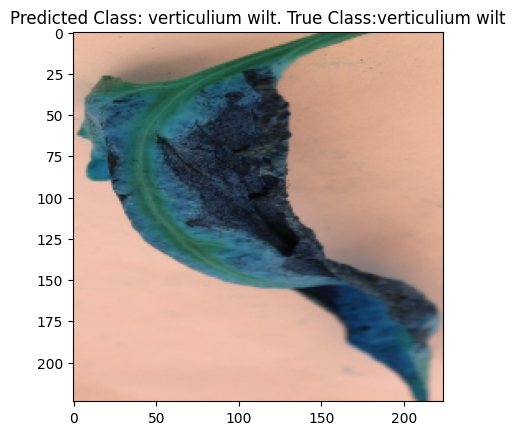


Generated Symptoms:  Symptoms of Verticillium Wilt

The first symptom of Verticillium wilt is yellowing and wilting of the lower leaves. The leaves then turn brown and die. The disease progresses up the plant, eventually killing the entire plant.

Other symptoms of Verticillium wilt include:

* Stunted growth
* Yellowing of the veins
* Brown streaks on the stems
* Wilting of the flowers and fruit
* Death of the plant

Verticillium wilt is a serious disease that can cause significant losses in tomato crops. There are no resistant varieties of tomatoes, so it is important to take steps to prevent the disease from spreading. These steps include:

* Using clean seed
* Avoiding planting tomatoes in fields where the disease has been present
* Rotating crops
* Using drip irrigation
* Removing and destroying infected plants
Prediction Confidence:  98.78


In [ ]:
### for a given image path , this function will provide the symptoms and predict the disease associated with it

selected_image_path = '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/verticulium wilt/1231tomato_train_verticulium wilt.JPG'
prediction, true_label, prediction_confidence,generated_symptoms = genrate_symptoms_and_classify_disease(selected_image_path)
image_data = load_images([selected_image_path])
plt.imshow(image_data[0])
plt.title(f"Predicted Class: {prediction}. True Class:{true_label}")
plt.show()
print("\nGenerated Symptoms:", generated_symptoms)
print('Prediction Confidence: ', prediction_confidence)

### Visualization of prediction with confidence

In [ ]:
selected_image_list = []
selected_image_list.append(image_paths[70])
selected_image_list.append(image_paths[110])
selected_image_list.append(image_paths[180])
selected_image_list.append(image_paths[230])
selected_image_list.append(image_paths[220])
selected_image_list.append(image_paths[300])
selected_image_list.append(image_paths[350])
selected_image_list.append(image_paths[470])
selected_image_list.append(image_paths[400])

1/1 [==============================] - 0s 42ms/step


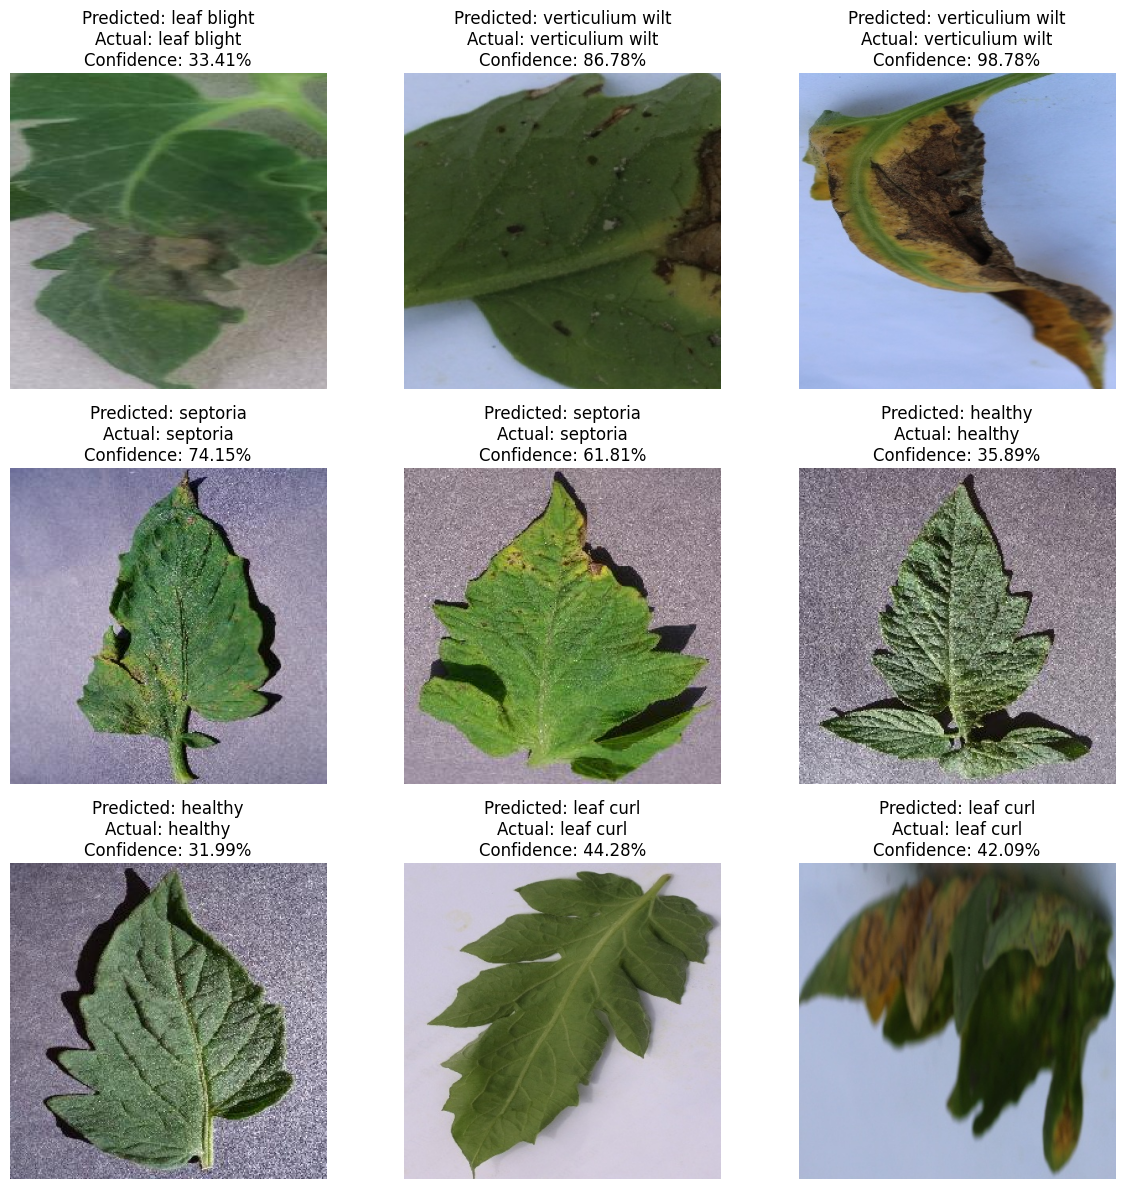

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12, 12))
for i, image_path in enumerate(selected_image_list):
    ax = plt.subplot(3, 3, i + 1)

    # Load the image
    image = mpimg.imread(image_path)

    # Display the image
    plt.imshow(image)

    # Assuming genrate_symptoms_and_classify_disease returns predicted_class, true_label, and confidence
    predicted_class, true_label, confidence,symptoms = genrate_symptoms_and_classify_disease(image_path)

    plt.title(f"Predicted: {predicted_class}\nActual: {true_label}\nConfidence: {confidence}%")
    plt.axis("off")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Generating cure for the predicted disease

In [ ]:
from PIL import Image


def generate_disease_cure_suggestion(image_path_link, predicted_disease_label):
      image = Image.open(image_path_link)
      retrieved_data =[]
      prompt = "describe the cure of predicted diseases label in tomato plant leaf image associated with it"

      query = "You will answer the given prompt using attached content : " + prompt
      retrieved_data.append(query)
      retrieved_data.append(image)
      retrieved_data.append(predicted_disease_label)
      response = vision_model.generate_content(retrieved_data)
      print(response.text)

      return response.text

In [ ]:
selected_image_path = '/content/drive/MyDrive/PLANT DISEASE RECOGNITION/data/verticulium wilt/1231tomato_train_verticulium wilt.JPG'
# Generate cure content  using the vision_model
generate_disease_cure_suggestion(selected_image_path, prediction)

 Verticillium dahliae is a soilborne fungus that causes Verticillium wilt in many plants, including tomato. The fungus infects the roots of plants and then grows up into the stem, where it blocks the flow of water and nutrients to the leaves. This causes the leaves to wilt and turn yellow, and eventually the plant will die.

There is no cure for Verticillium wilt, but there are a number of things that can be done to prevent the disease. These include:

* Using resistant tomato varieties
* Avoiding planting tomatoes in fields where the disease has been present in the past
* Rotating crops
* Using clean seed
* Removing and destroying infected plants
* Keeping the soil moist but not waterlogged


' Verticillium dahliae is a soilborne fungus that causes Verticillium wilt in many plants, including tomato. The fungus infects the roots of plants and then grows up into the stem, where it blocks the flow of water and nutrients to the leaves. This causes the leaves to wilt and turn yellow, and eventually the plant will die.\n\nThere is no cure for Verticillium wilt, but there are a number of things that can be done to prevent the disease. These include:\n\n* Using resistant tomato varieties\n* Avoiding planting tomatoes in fields where the disease has been present in the past\n* Rotating crops\n* Using clean seed\n* Removing and destroying infected plants\n* Keeping the soil moist but not waterlogged'

### Plotting Accuracy

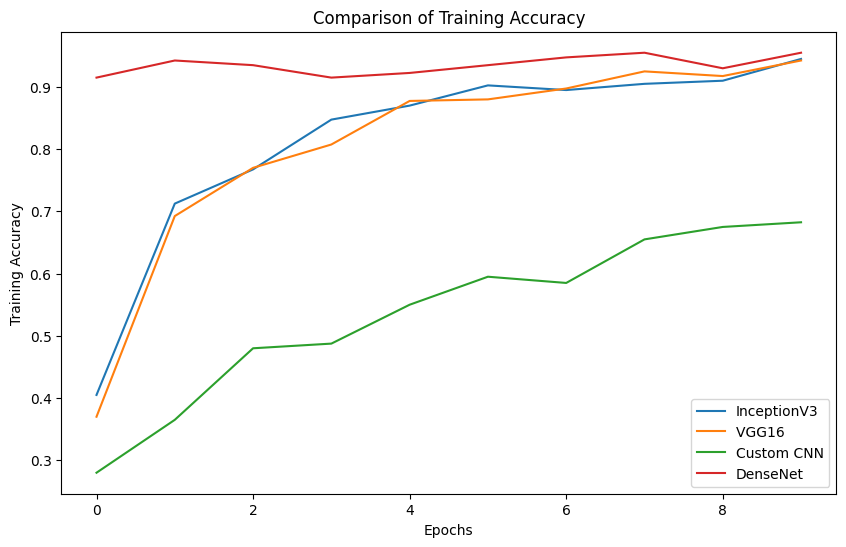

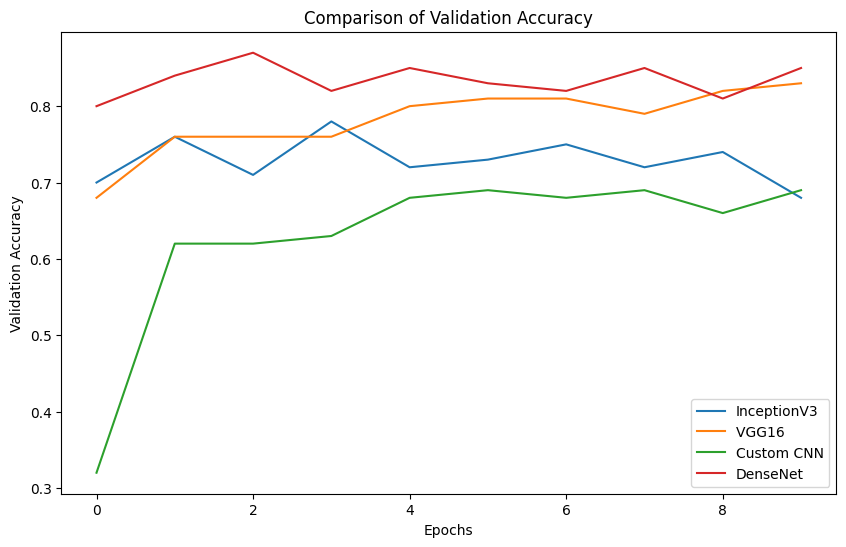

In [ ]:
import matplotlib.pyplot as plt

# Plotting training accuracy comparison
plt.figure(figsize=(10, 6))
plt.plot(acc_inceptionV3, label='InceptionV3')
plt.plot(acc_VGG16, label='VGG16 ')
plt.plot(acc_custom_CNN, label='Custom CNN')
plt.plot(acc_denseNet, label='DenseNet')
plt.title('Comparison of Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Plotting validation accuracy comparison
plt.figure(figsize=(10, 6))
plt.plot(val_acc_inceptionV3, label='InceptionV3')
plt.plot(val_acc_VGG16, label='VGG16 ')
plt.plot(val_acc_custom_CNN, label='Custom CNN')
plt.plot(val_acc_denseNet, label='DenseNet')
plt.title('Comparison of Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
